In [2]:
# start with the ODEs in the paper
# enter code to calculate conductances, calculate currents, calculate new state variables
# walk through plotting

In [73]:
# import packages for plotting
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

# ODEs
def dvdt(v, IK, INa, Il):
    return 1/Cm * (I - (IK + INa + Il))

def dndt(v, n):
    return An(v) * (1 - n) - (Bn(v) * (n))

def dmdt(v, m):
    return Am(v) * (1 - m) - (Bm(v) * (m))

def dhdt(v, h):
    return Ah(v) * (1 - h) - (Bh(v) * (h))

# variables w/r/t v
def An(v):
    return (0.01 * (v + 50)) / (1 - np.exp((-(v + 50)) / 10))

def Bn(v):
    return 0.125 * np.exp(-(v + 60) / 80)

def Am(v):
    return (0.1 * (v + 35)) / (1 - np.exp((-(v + 35)) / 10))

def Bm(v):
    return 4.0 * np.exp(-0.0556 * (v + 60))

def Ah(v):
    return 0.07 * np.exp(-0.05 * (v + 60))

def Bh(v):
    return 1 / (1 + np.exp(-0.1 * (v + 30)))

# constants
Cm = 0.01          # membrane capacitance
ENa = 55.17        # reversal potential for sodium
EK = -72.14        # reversal potential for potassium
El = -49.42        # reversal potential for leak current
g_bar_Na = 1.2     # max sodium conductance
g_bar_K = 0.36     # max potassium conductance
g_bar_l = 0.003    # max leak conductance
I = 0.2            # external current applied

## vars for forward Euler simulation
dt = 0.01          # timestep
ms_to_plot = 30    # miliseconds to simulate

## initialize lists of values that we're calculating at each timestep
t = np.arange(0, ms_to_plot, dt)
v_array = [-60]
n_array = [An(v_array[0]) / (An(v_array[0]) + Bn(v_array[0])) ]
m_array = [Am(v_array[0]) / (Am(v_array[0]) + Bm(v_array[0])) ]
h_array = [Ah(v_array[0]) / (Ah(v_array[0]) + Bh(v_array[0])) ]
gK_array = [g_bar_K * n_array[0]**4]
gNa_array = [g_bar_Na * (m_array[0]**3) * h_array[0]]
gl_array = [g_bar_l]
IK_array = [gK * (v_array[0] - EK)]
INa_array = [gNa * (v_array[0] - ENa)]
Il_array = [gl * (v_array[0] - El)]

# simulate a bunch of small timesteps
for i in range(0, len(t) - 1):

    # grab previous stored voltage and k+/na+ channel states
    v = v_array[i]
    n = n_array[i]
    m = m_array[i]
    h = h_array[i]

    # calculate conductances
    gK = g_bar_K * n**4
    gNa = g_bar_Na * (m**3) * h
    gl = g_bar_l

    # calculate currents (conductance * driving force)
    IK = gK * (v - EK)
    INa = gNa * (v - ENa)
    Il = gl * (v - El)

    # calculate v/n/m/h change by taking small timestep
    # e.g. new voltage is voltage + (timestep * voltage change)
    new_v = v + dt * dvdt(v, IK, INa, Il)
    new_n = n + dt * dndt(v, n)
    new_m = m + dt * dmdt(v, m)
    new_h = h + dt * dhdt(v, h)
    
    # save calculated values for plotting later
    n_array.append(new_n)
    m_array.append(new_m)
    h_array.append(new_h)
    v_array.append(new_v)
    gK_array.append(gK)
    gNa_array.append(gNa)
    gl_array.append(gl)
    IK_array.append(IK)
    INa_array.append(INa)
    Il_array.append(Il)


Text(0.5, 0, 'time (ms)')

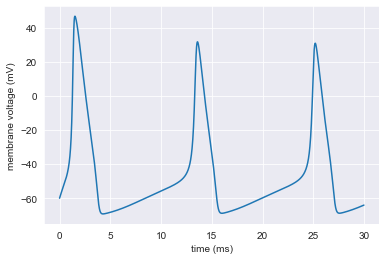

In [74]:
# guiding questions:
# does the neuron spike?
# where's the action potential threshold? (in the graph, in the equations)
# what are the different channels doing at each part of the action potential? (what do we plot to confirm it?)

# plot voltage and decorate
plt.figure()
plt.plot(t, v_array)
plt.ylabel('membrane voltage (mV)')
plt.xlabel('time (ms)')

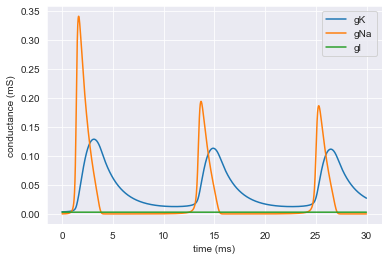

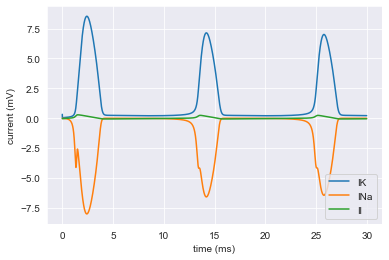

In [75]:
# guiding questions:
# what's conductance? how is it different from current?
# what does the sign (+/-) of the current represent?

# plot conductances and decorate
plt.figure()
plt.plot(t, gK_array, label='gK')
plt.plot(t, gNa_array, label='gNa')
plt.plot(t, gl_array, label='gl')
plt.xlabel('time (ms)')
plt.ylabel('conductance (mS)')
plt.legend()

plt.figure()
plt.plot(t, IK_array, label='IK')
plt.plot(t, INa_array, label='INa')
plt.plot(t, Il_array, label='Il')
plt.xlabel('time (ms)')
plt.ylabel('current (mV)')
plt.legend()

In [ ]:
# what variables could we tweak in our model? can/how would these be experimentally tested?
# input current. how many spikes do we get? what happens to individual ion currents? (0.2, 0.8, 1.4)
# membrane capacitance. (0.01, 0.1). what's capacitance? how does this affect threshold


In [ ]:
# plot Na conductance, inactivation, and current
# normalize Na current for plotting
norm_Na = np.array(INa_array)
norm_Na = -1 * ((norm_Na - norm_Na.min()) / (norm_Na.max() - norm_Na.min())) + 1

# plot and decorate
plt.figure()
plt.plot(t, gNa_array, label='gNa')
plt.plot(t, 1-np.array(h_array), label='h (inactivation)')
plt.plot(t, norm_Na, label='INa (normalized)')
plt.legend()

# plot currents and voltage
plt.plot(t, IK_array, label='IK')
plt.plot(t, INa_array, label='INa')
plt.plot(t, Il_array, label='Il')
plt.plot(t, v_array, label='Vm')